# 感知器

感知机是一种较为简单的二分类模型，但由简至繁，感知机却是神经网络和支持向量机的基础。感知机旨在学习能够将输入数据划分为+1/-1的线性分离超平面，所以说整体而言感知机是一种线性模型。

## 感知机原理

假设输入x表示为任意实例的特征向量，输出y={+1,-1}为实例的类别。感知机定义由输入到输出的映射函数如下：

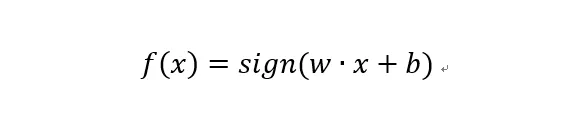

其中sign符号函数为：

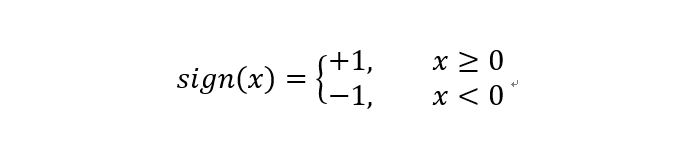

感知机的训练目标就是找到这个线性可分的超平面。为此，定义感知机模型损失函数如下：

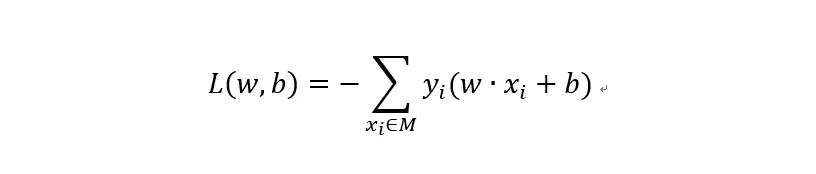

**yi为已知的标签（+1，-1），括号里的预测标签的一部分——sign里的x，异号则说明分类错误**

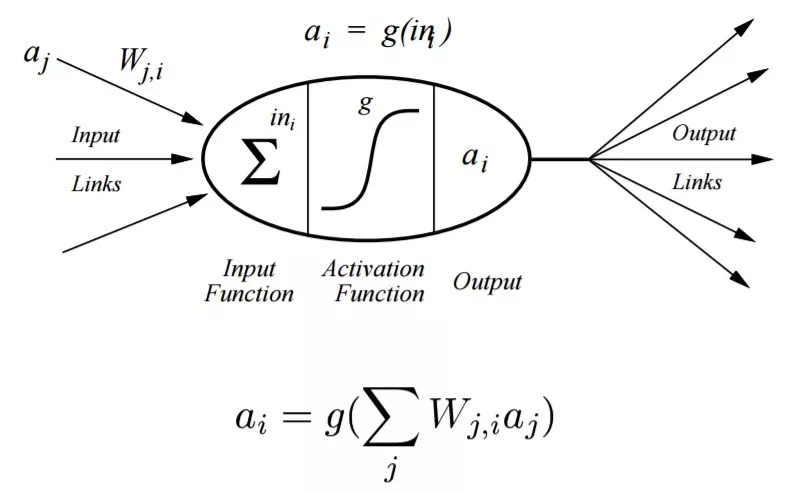

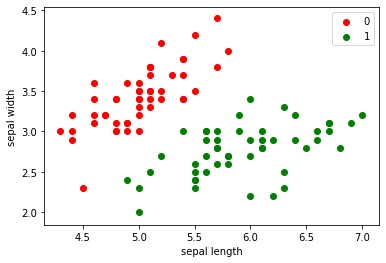

In [1]:

# 导入相关库
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

# 导入iris数据集
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['label'] = iris.target
df.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'label']

# 绘制散点图
plt.scatter(df[:50]['sepal length'], df[:50]['sepal width'], c='red', label='0')
plt.scatter(df[50:100]['sepal length'], df[50:100]['sepal width'], c='green', label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend();

In [2]:

# 取两列数据并将并将标签转化为1/-1
data = np.array(df.iloc[:100, [0, 1, -1]])
X, y = data[:,:-1], data[:,-1]
y = np.array([1 if i == 1 else -1 for i in y])

In [3]:

# 定义参数初始化函数
def initilize_with_zeros(dim):
    w = np.zeros(dim)
    b = 0.0
    return w, b

In [4]:

# 定义sign符号函数
def sign(x, w, b):
    return np.dot(x,w)+b

In [5]:
def train(X_train, y_train, learning_rate):
    # 参数初始化
    w, b = initilize_with_zeros(X_train.shape[1])
    # 初始化误分类
    is_wrong = False
    while not is_wrong:
        wrong_count = 0
        for i in range(len(X_train)):
            X = X_train[i]
            y = y_train[i]
            # 如果存在误分类点
            # 更新参数
            # 直到没有误分类点
            if y * sign(X, w, b) <= 0:
                w = w + learning_rate*np.dot(y, X)
                b = b + learning_rate*y
                wrong_count += 1
        if wrong_count == 0:
            is_wrong = True
            print('There is no missclassification!')
        
        # 保存更新后的参数
        params = {
            'w': w,
            'b': b
        }
    return params

In [6]:

params = train(X, y, 0.01)
params

There is no missclassification!


{'w': array([ 0.79 , -1.007]), 'b': -1.2400000000000009}

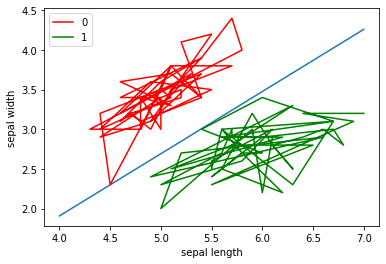

In [7]:

x_points = np.linspace(4, 7, 10)
y_hat = -(params['w'][0]*x_points + params['b'])/params['w'][1]
plt.plot(x_points, y_hat)

plt.plot(data[:50, 0], data[:50, 1], color='red', label='0')
plt.plot(data[50:100, 0], data[50:100, 1], color='green', label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()